In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing dataset
dataset = pd.read_csv('C:\\Users\\Qing Chen\\Desktop\\dataset\\Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# extracting only the independent variables
X = dataset.iloc[:,[2,3]].values

# dependent variable
y = dataset.iloc[:,4].values

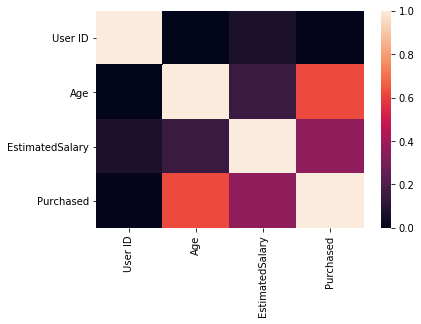

In [4]:
# visulization the dataset by drawing a correlation map
sns.heatmap(dataset.corr())

In [5]:
# splitting
from sklearn.cross_validation import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=0)

C:\Users\Qing Chen\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\Qing Chen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Qing Chen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Qing Chen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
# Fitting logistics regression to training dataset
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(random_state = 0)
classifer.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
# predicting the test set result
y_pred = classifer.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

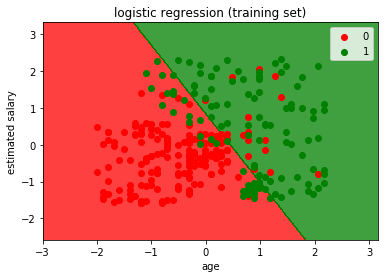

In [24]:
# visualising the training set results
from matplotlib.colors import ListedColormap
X_set = X_train
y_set = y_train
x1,x2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1,step = 0.01),
                   (np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1,step = 0.01)))

                    
plt.contourf(x1,x2,classifer.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i), label= j)
    
plt.title('logistic regression (training set)')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()
                    

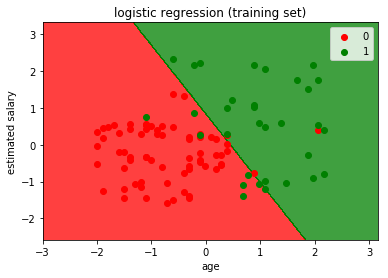

In [25]:
# test data visul
X_set = X_test
y_set = y_test
x1,x2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1,step = 0.01),
                   (np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1,step = 0.01)))

                    
plt.contourf(x1,x2,classifer.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i), label= j)
    
plt.title('logistic regression (training set)')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [28]:
from sklearn import metrics

# define a function to evaluate our classification models based on four metrics
def get_metrics(true_labels, predicted_labels):
    
    print ('Accuracy:', np.round(                                                    
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        2))
    print ('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels),
                        2))
    print ('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels),
                        2))
    print ('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels),
                        2))

In [29]:
get_metrics(y_test,y_pred)

Accuracy: 0.89
Precision: 0.89
Recall: 0.75
F1 Score: 0.81
